## Ice Game Store

### Pendahuluan

**Tempat jualan game, dimana pada tahun 2016 telah menghasilkan data yang cukup untuk menambah keuntungan pada tahun 2017, dengan cara melakukan kampanye.**

**Dengan adanya ESRB (Entertainment Softwere Rating Board, kita sebagai data analyst di tuntuk untuk bisa memberikan konsultasi kampanye kepada Ice, dari hasil evaluasi ESRB yang mendasari konten game dan rating usia**

### Tujuan Analysist

- Melakukan pengecekan data penjualan game 
- didasari referensi dari wilayah, genre, total penjualan, rating, dan kritik dari pengguna
- Memberikan pendapat bagaimana meningkatkan penjualan pada tahun 2017

In [4]:
import pandas as pd, numpy as np

import matplotlib.pyplot as plt, seaborn as sns 
from scipy import stats as st

import warnings

pd.set_option('display.max_columns',100)
warnings.filterwarnings('ignore')

In [5]:
db = pd.read_csv('games.csv')

In [6]:
db.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


***1. Melakukan pergantian nama kolom menjadi huruf kecil semua***

## Melakukan pergantian nama kolom menjadi huruf kecil semua

In [7]:
db.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

In [8]:
db.columns = db.columns.str.lower()

In [9]:
db.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

## Konversikan data ke tipe yang di butuhkan

In [10]:
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


### Terdapat hal menarik pada data frame yang di berikan oleh ice terkait nilai yang hilang dan harusnya di lakukan eksplorasi pada dataset dan kolom tertentu

In [12]:
db_rating_unique = len(db['rating'].unique())

In [13]:
db_rating_unique

9

In [14]:
db_rating = db['rating'].unique()

In [15]:
db_rating

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

In [16]:
db.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

In [17]:
rating_nan = db.loc[db['rating'].isna()]

In [18]:
rating_nan.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
12,Pokemon Gold/Pokemon Silver,GB,1999.0,Role-Playing,9.00,6.18,7.20,0.71,NaN,NaN,NaN
18,Super Mario World,SNES,1990.0,Platform,12.78,3.75,3.54,0.55,NaN,NaN,NaN
20,Pokemon Diamond/Pokemon Pearl,DS,2006.0,Role-Playing,6.38,4.46,6.04,1.36,NaN,NaN,NaN
21,Super Mario Land,GB,1989.0,Platform,10.83,2.71,4.18,0.42,NaN,NaN,NaN
22,Super Mario Bros. 3,NES,1988.0,Platform,9.54,3.44,3.84,0.46,NaN,NaN,NaN


In [19]:
db['rating'].fillna('U')


0        E
1        U
2        E
3        E
4        U
        ..
16710    U
16711    U
16712    U
16713    U
16714    U
Name: rating, Length: 16715, dtype: object

## Kesimpulan Awal

***Dengan menggunakan pergantian nilai pada kolom rating dari NaN, menjadi 'U' yang merupakan singkatan dari "Underated". Hal ini kita lakukan untuk dapat membuat hipotesis kedepannya untuk analysis yang sksn di jalankan***

***Mengapa hal ini menurut saya perlu di lakukan, dari data frame Ice, terdapat kegantilan yang saya perhatikan pada table dimana ada nilai NaN dan di lanjutkan dengan 2 nilai NaN lagi pada kolom rating, dan user_score.***

## Melakukan pergantian nilai dengan menyamakan game yang memiliki persamaan di rating yang memiliki NaN, akan tetapi memiliki nilai yang sama dengan nilai user_score dan critic_score 


In [16]:
db.duplicated().sum()

0

In [17]:
db.shape

(16715, 11)

In [18]:
db.isnull().sum() / len(db) * 100

name                0.011965
platform            0.000000
year_of_release     1.609333
genre               0.011965
na_sales            0.000000
eu_sales            0.000000
jp_sales            0.000000
other_sales         0.000000
critic_score       51.319174
user_score         40.089740
rating             40.478612
dtype: float64

In [19]:
db.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


In [20]:
db.dtypes

name                object
platform            object
year_of_release    float64
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score       float64
user_score          object
rating              object
dtype: object

***Di lihat dari dataset dan data frame. tipe data yang harus di ganti adalah year_of_release, other_sales, critic_score, user_score,dan rating***

In [21]:
db_renamed_clean = db[db['name'].notnull()].reset_index(drop=True)

In [22]:
db_renamed_clean['year_of_release'] = db_renamed_clean['year_of_release'].fillna(0)

In [23]:
db_renamed_clean['year_of_release'] = db_renamed_clean['year_of_release'].astype('int')

In [24]:
db_renamed_clean['other_sales'] = db_renamed_clean['other_sales'].astype('int')

In [25]:
db.dtypes

name                object
platform            object
year_of_release    float64
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score       float64
user_score          object
rating              object
dtype: object

***Proses pergantian tipe data memerlukan proses bertahap untuk analysis berkelanjutan. oleh karena itu tidak semua tipe data di ganti secara bersamaan***

## Temukan Nilai Nilai yang hilang

In [26]:
db.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

In [27]:
db_renamed_clean.isnull().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8576
user_score         6699
rating             6764
dtype: int64

# Kesimpulan awal

***Terdapat beberapa keganjilan pada 'other_sales','critic_score','ratng'. setelah melakukan beberapa analysis, ada keterkaitan dari name dan year_of release. oleh karena itu kedua kolom di lakukan perbaikan***

## Melakukan pengecekan terhadap konversi tipe data, dan membetulkan jika ada yang salah

In [28]:
db_renamed_clean['user_score'] = db_renamed_clean['user_score'].replace('tbd',np.nan)

In [29]:
db_renamed_clean['user_score'].astype('float')

0        8.0
1        NaN
2        8.3
3        8.0
4        NaN
        ... 
16708    NaN
16709    NaN
16710    NaN
16711    NaN
16712    NaN
Name: user_score, Length: 16713, dtype: float64

In [30]:
db_renamed_clean['user_score'] = db_renamed_clean['user_score'].astype('float')

In [31]:
db_renamed_clean['total_sales'] = db_renamed_clean[['na_sales','eu_sales','jp_sales','other_sales']].sum(axis=1) 

In [32]:
db_renamed_clean

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8,76.0,8.0,E,82.09
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0,NaN,NaN,NaN,39.47
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3,82.0,8.3,E,35.23
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2,80.0,8.0,E,31.82
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1,NaN,NaN,NaN,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16708,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0,NaN,NaN,NaN,0.01
16709,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0,NaN,NaN,NaN,0.01
16710,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0,NaN,NaN,NaN,0.01
16711,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0,NaN,NaN,NaN,0.01


# Kesimpulan tahap 2

***Dengan penggunaan kolom total_sales kita bisa melihat banyaknya game yang di beli dari yang paling banyak sampai yang paling sedikit pada tahun tahun 2016***

## Melakukan peninjauan persebaran data game di lihat dari platform, year_of_release,genre, other_sales, dan total_sales

In [33]:
db_renamed_clean.groupby(['year_of_release'])['name'].count().reset_index().astype('int')

,year_of_release,name
0,0,269
1,1980,9
2,1981,46
3,1982,36
4,1983,17
5,1984,14
6,1985,14
7,1986,21
8,1987,16
9,1988,15


In [34]:
db_renamed_clean['platform'].value_counts()

PS2     2161
DS      2151
PS3     1331
Wii     1320
X360    1262
PSP     1209
PS      1197
PC       974
XB       824
GBA      822
GC       556
3DS      520
PSV      430
PS4      392
N64      319
XOne     247
SNES     239
SAT      173
WiiU     147
2600     133
GB        98
NES       98
DC        52
GEN       27
NG        12
SCD        6
WS         6
3DO        3
TG16       2
PCFX       1
GG         1
Name: platform, dtype: int64

In [35]:
db_year = db_renamed_clean.groupby(['year_of_release'])['name'].count().reset_index().astype('int')

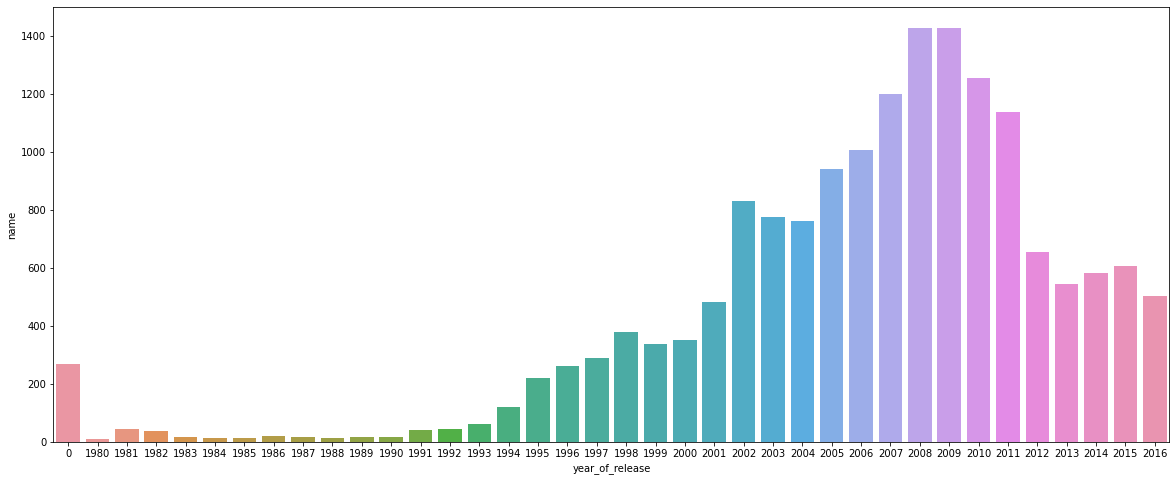

In [36]:
plt.figure(figsize=(20,8))
sns.barplot(data=db_year, x='year_of_release', y='name') ;


In [37]:
db_renamed_clean.groupby(['year_of_release'])['platform'].count().reset_index().astype('int')

,year_of_release,platform
0,0,269
1,1980,9
2,1981,46
3,1982,36
4,1983,17
5,1984,14
6,1985,14
7,1986,21
8,1987,16
9,1988,15


In [38]:
db_platform = db_renamed_clean.groupby(['year_of_release'])['platform'].count().reset_index().astype('int')

In [39]:
db_platform1 = db_renamed_clean.groupby(['year_of_release'])['platform'].value_counts()

In [40]:
db_platform1

year_of_release  platform
0                PS2         34
                 Wii         34
                 DS          30
                 X360        30
                 PS3         25
                             ..
2016             3DS         46
                 PS3         38
                 WiiU        14
                 X360        13
                 Wii          1
Name: platform, Length: 254, dtype: int64

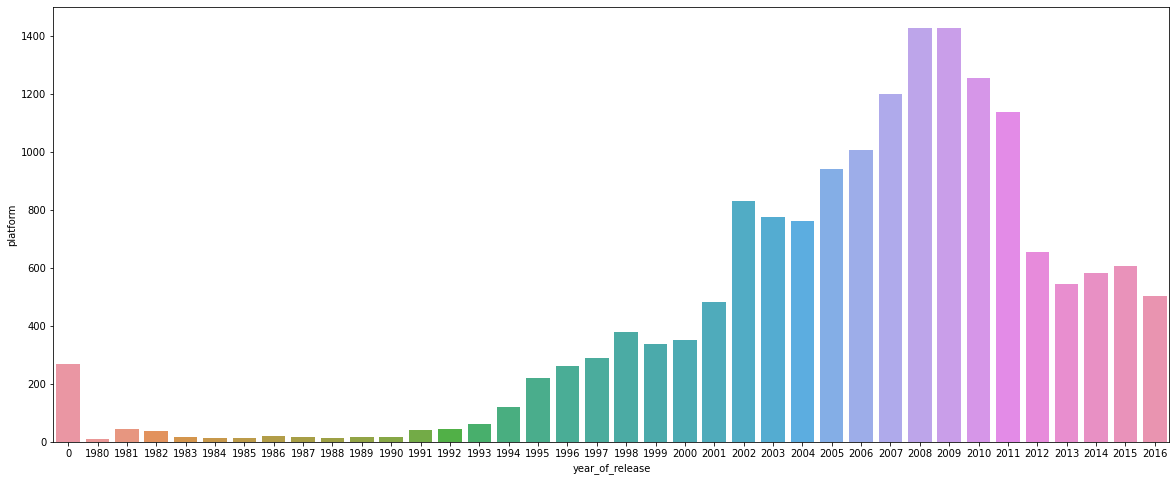

In [41]:
plt.figure(figsize=(20,8))
sns.barplot(data=db_platform, x='year_of_release', y='platform') ;

In [42]:
db_renamed_clean.groupby(['platform'])['total_sales'].count().reset_index()

,platform,total_sales
0,2600,133
1,3DO,3
2,3DS,520
3,DC,52
4,DS,2151
5,GB,98
6,GBA,822
7,GC,556
8,GEN,27
9,GG,1


## Kesimpulan tahap 3
- Dengan penggunaan barplot untuk melihat release platform pada tahun 2008 dan 2009 yang sangat banyak terjualnya
- Terdapat anomali pada tahun 2008 dan 2009, Penjualan PS2 no 1,disusul dengan DS, PS3, Wii, X360
- untuk itu perlu di lakukan pengecekan mengapa banyak penjualan game dan apakah ada korelasinya penjualan game dengan penjualan platform 

## Jika di lihat dari 2 barplot dapat di simpulkan ada korelasi penjualan platform yang berkurang akan tetapi belum bisa menyimpulkan pengaruh yang di timbulkan terhadap penjualan 

In [43]:
db_platform_sales = db_renamed_clean.groupby(['platform'])['total_sales'].sum().sort_values().reset_index()

In [44]:
db_platform_sales.head(37)

,platform,total_sales
0,PCFX,0.03
1,GG,0.04
2,3DO,0.10
3,TG16,0.16
4,WS,1.42
5,NG,1.44
6,SCD,1.81
7,DC,15.68
8,GEN,27.46
9,SAT,33.52


## Melakukan pengecekan bagaimana variasi penjualan berbagai platform

In [45]:
db_platform_sales_pivot = db_renamed_clean[db_renamed_clean['year_of_release']!=0].reset_index(drop=True)

In [46]:
db_platform_sales = db_renamed_clean.groupby(['platform'])['year_of_release'].sum().sort_values().reset_index()

In [47]:
db_platform_sales_pivot.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8,76.0,8.0,E,82.09
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0,NaN,NaN,NaN,39.47
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3,82.0,8.3,E,35.23
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2,80.0,8.0,E,31.82
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1,NaN,NaN,NaN,31.38


In [48]:
db_platform_sales =  pd.pivot_table(
    db_platform_sales_pivot,index='year_of_release', columns='platform', values='total_sales', aggfunc=sum).fillna(0).astype(int)


In [49]:
db_platform_sales

platform,2600,3DO,3DS,DC,DS,GB,GBA,GC,GEN,GG,N64,NES,NG,PC,PCFX,PS,PS2,PS3,PS4,PSP,PSV,SAT,SCD,SNES,TG16,WS,Wii,WiiU,X360,XB,XOne
year_of_release,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1980,11,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1981,35,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1982,28,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1983,5,0,0,0,0,0,0,0,0,0,0,10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1984,0,0,0,0,0,0,0,0,0,0,0,49,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1985,0,0,0,0,0,0,0,0,0,0,0,52,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1986,0,0,0,0,0,0,0,0,0,0,0,35,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1987,1,0,0,0,0,0,0,0,0,0,0,19,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1988,0,0,0,0,0,1,0,0,0,0,0,44,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


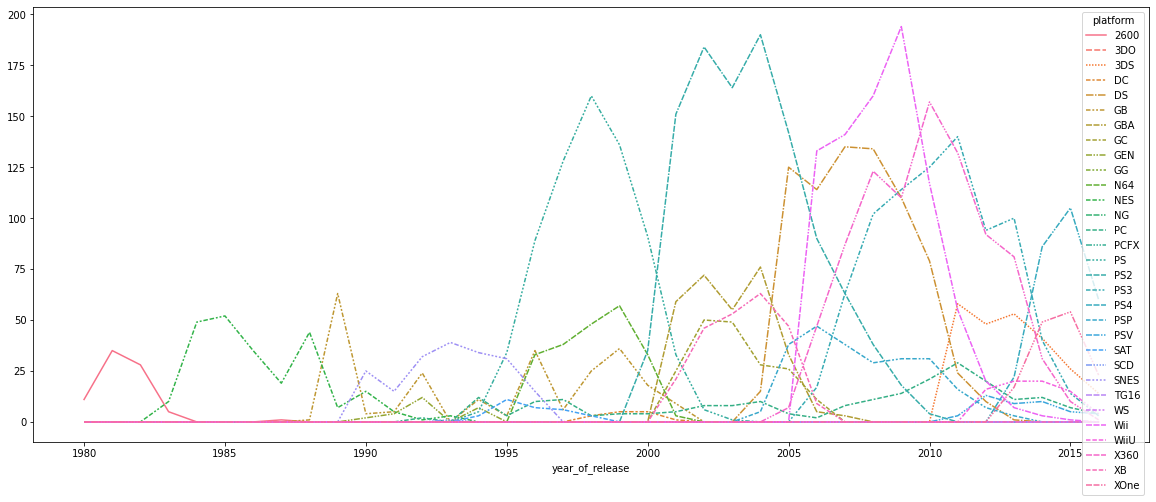

In [50]:
plt.figure(figsize=(20,8))
sns.lineplot(data=db_platform_sales);


## Kesimpulan tahap 4

- Terdapat 5 platform yang memiliki penjualan paling banyak, untuk itu pengecekan lebih lanjut mengenai platform tersebut perlu untuk dilakukan
- PS2 merupakan platform dengan performa penjualan terbanyak
- PS3 merupakan platform dengan performa penjualan terbanyak ke dua pada tahun 2008 dan 2009
- Dengan membuat lineplot dan pivot table kita melihat persebaran penjualannya dari tahun ke tahun dan yang paling banyak terjual pada tahun 2008 dan 2009 
- padahal PS2 release nya pada tahun 2000


## Menentukan bagaimana platform mempengaruhi penjualan game dari kolom total sales

In [51]:
db_renamed_clean.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8,76.0,8.0,E,82.09
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0,NaN,NaN,NaN,39.47
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3,82.0,8.3,E,35.23
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2,80.0,8.0,E,31.82
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1,NaN,NaN,NaN,31.38


In [52]:
db_odo = db_renamed_clean[db_renamed_clean['year_of_release']>=2013].reset_index(drop=True)

In [53]:
db_renamed_clean.shape, db_odo.shape

((16713, 12), (2233, 12))

In [54]:
db_odo_renamed_clean = db_odo.groupby(['platform'])['total_sales'].sum().sort_values().reset_index()

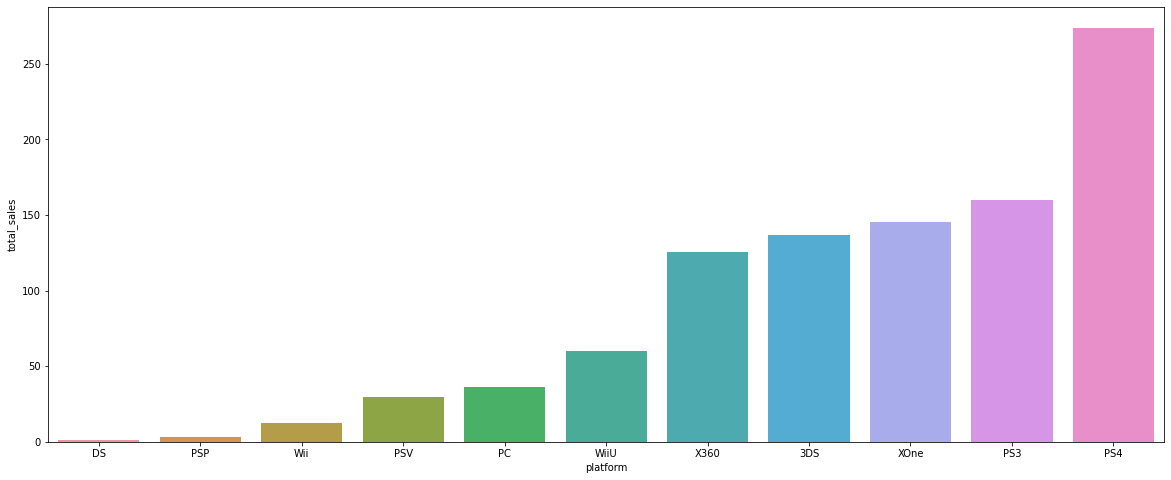

In [55]:
plt.figure(figsize=(20,8))
sns.barplot(data=db_odo_renamed_clean, x='platform', y='total_sales') ;


***dapat dilihat pada tahun 2013 ps4 merupakan platform yang paling laku terjual sampai tahun 2016. PS3, xOne, 3DS, X360 selanjutnya memiliki berbagai macam game yang memiliki nilai jual dimana bisa menjadi tujuan pembuatan penjualan untuk tujuan pemasaran di tahun 2017***

## Melakukan pengecekan pengetahuan akan penjualan global dari rata rata setiap platform, untuk mengetahui beberapa penjualan yang signifikan

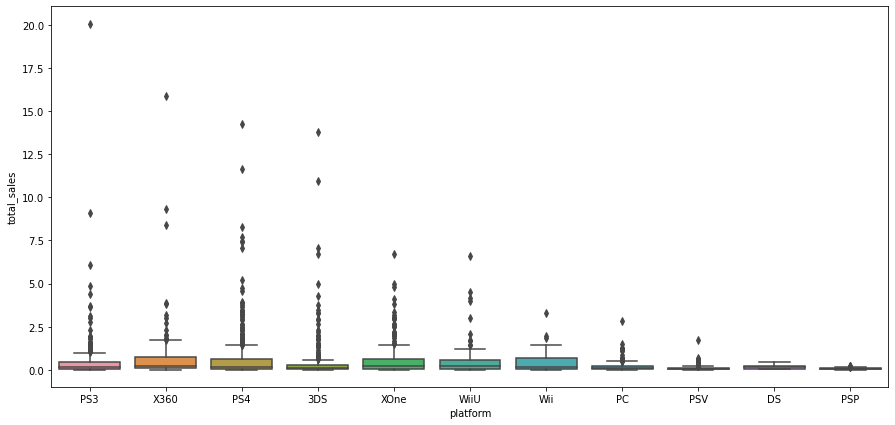

In [56]:
plt.figure(figsize=(15,7))
sns.boxplot(x='platform',y='total_sales', data=db_odo) ;

In [57]:
db_qru_ps4 = db_odo.groupby(['platform','name'])['total_sales','critic_score','user_score','name'].sum(
).query('platform == "PS4" & critic_score > 0 & user_score > 0').reset_index()

In [58]:
db_qru_ps4

,platform,name,total_sales,critic_score,user_score
0,PS4,7 Days to Die,0.12,45.0,5.9
1,PS4,Aegis of Earth: Protonovus Assault,0.02,57.0,7.8
2,PS4,Agatha Christie's The ABC Murders,0.02,67.0,6.2
3,PS4,Alien: Isolation,0.95,79.0,8.1
4,PS4,Angry Birds Star Wars,0.18,47.0,2.0
...,...,...,...,...,...
244,PS4,World of Final Fantasy,0.30,77.0,8.3
245,PS4,Worms: WMD,0.03,78.0,7.6
246,PS4,XCOM 2,0.12,88.0,8.0
247,PS4,Zombie Army Trilogy,0.17,62.0,6.8


In [59]:
db_qru_ps4.corr()

,total_sales,critic_score,user_score
total_sales,1.000000,0.394189,-0.038089
critic_score,0.394189,1.000000,0.557654
user_score,-0.038089,0.557654,1.000000


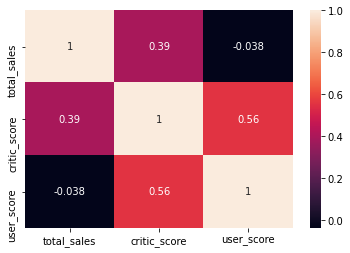

In [60]:
sns.heatmap(db_qru_ps4.corr(),annot=True) ;

# Untuk melakukan pengecekan adanya korelasi pada kolom critic_score dan total_sales
- Hal ini merupakan upaya visualisasi korelasi data yang di kumpulkan pada tahun 2016 dimana critic_score sangat mempengaruhi total_sales
- memberikan visualisasi dimana memperlihatkan ps4 merupakan platform yang memiliki penjualan terbanyak 
- korelasi lanjutan untuk mencari tahu apakah ada korelasi genre, critic_score , user_score, dan rating mempengaruhi penjualan



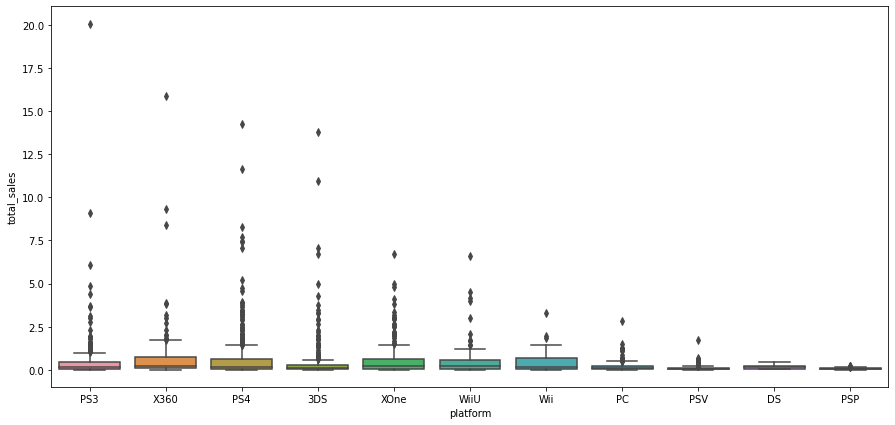

In [62]:
plt.figure(figsize=(15,7))
sns.boxplot(x='platform',y='total_sales', data=db_odo) ;

In [63]:
db_qru_ps4

,platform,name,total_sales,critic_score,user_score
0,PS4,7 Days to Die,0.12,45.0,5.9
1,PS4,Aegis of Earth: Protonovus Assault,0.02,57.0,7.8
2,PS4,Agatha Christie's The ABC Murders,0.02,67.0,6.2
3,PS4,Alien: Isolation,0.95,79.0,8.1
4,PS4,Angry Birds Star Wars,0.18,47.0,2.0
...,...,...,...,...,...
244,PS4,World of Final Fantasy,0.30,77.0,8.3
245,PS4,Worms: WMD,0.03,78.0,7.6
246,PS4,XCOM 2,0.12,88.0,8.0
247,PS4,Zombie Army Trilogy,0.17,62.0,6.8


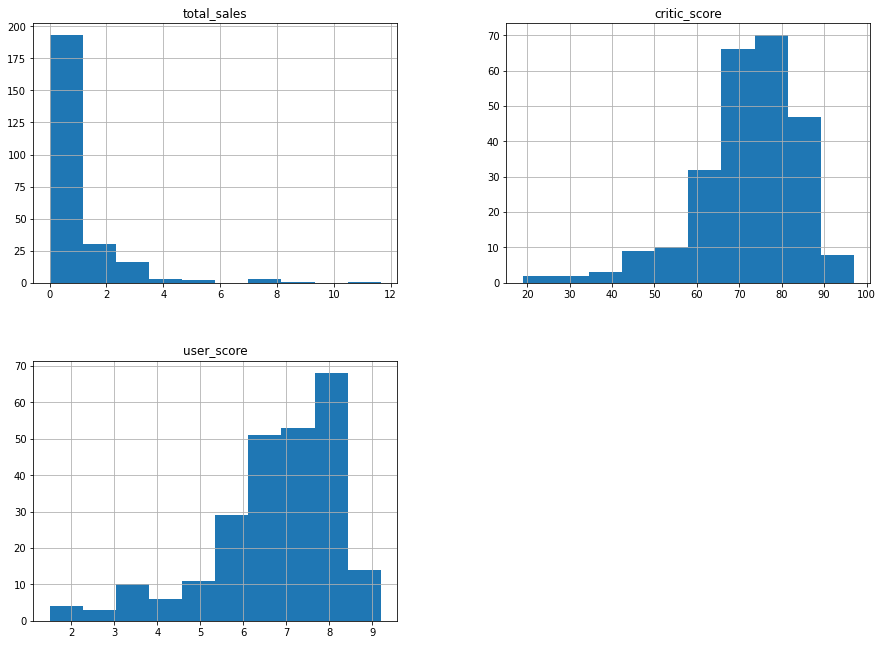

In [134]:
db_qru_ps4.hist(figsize= (15,11), bins= 10)
plt.show()

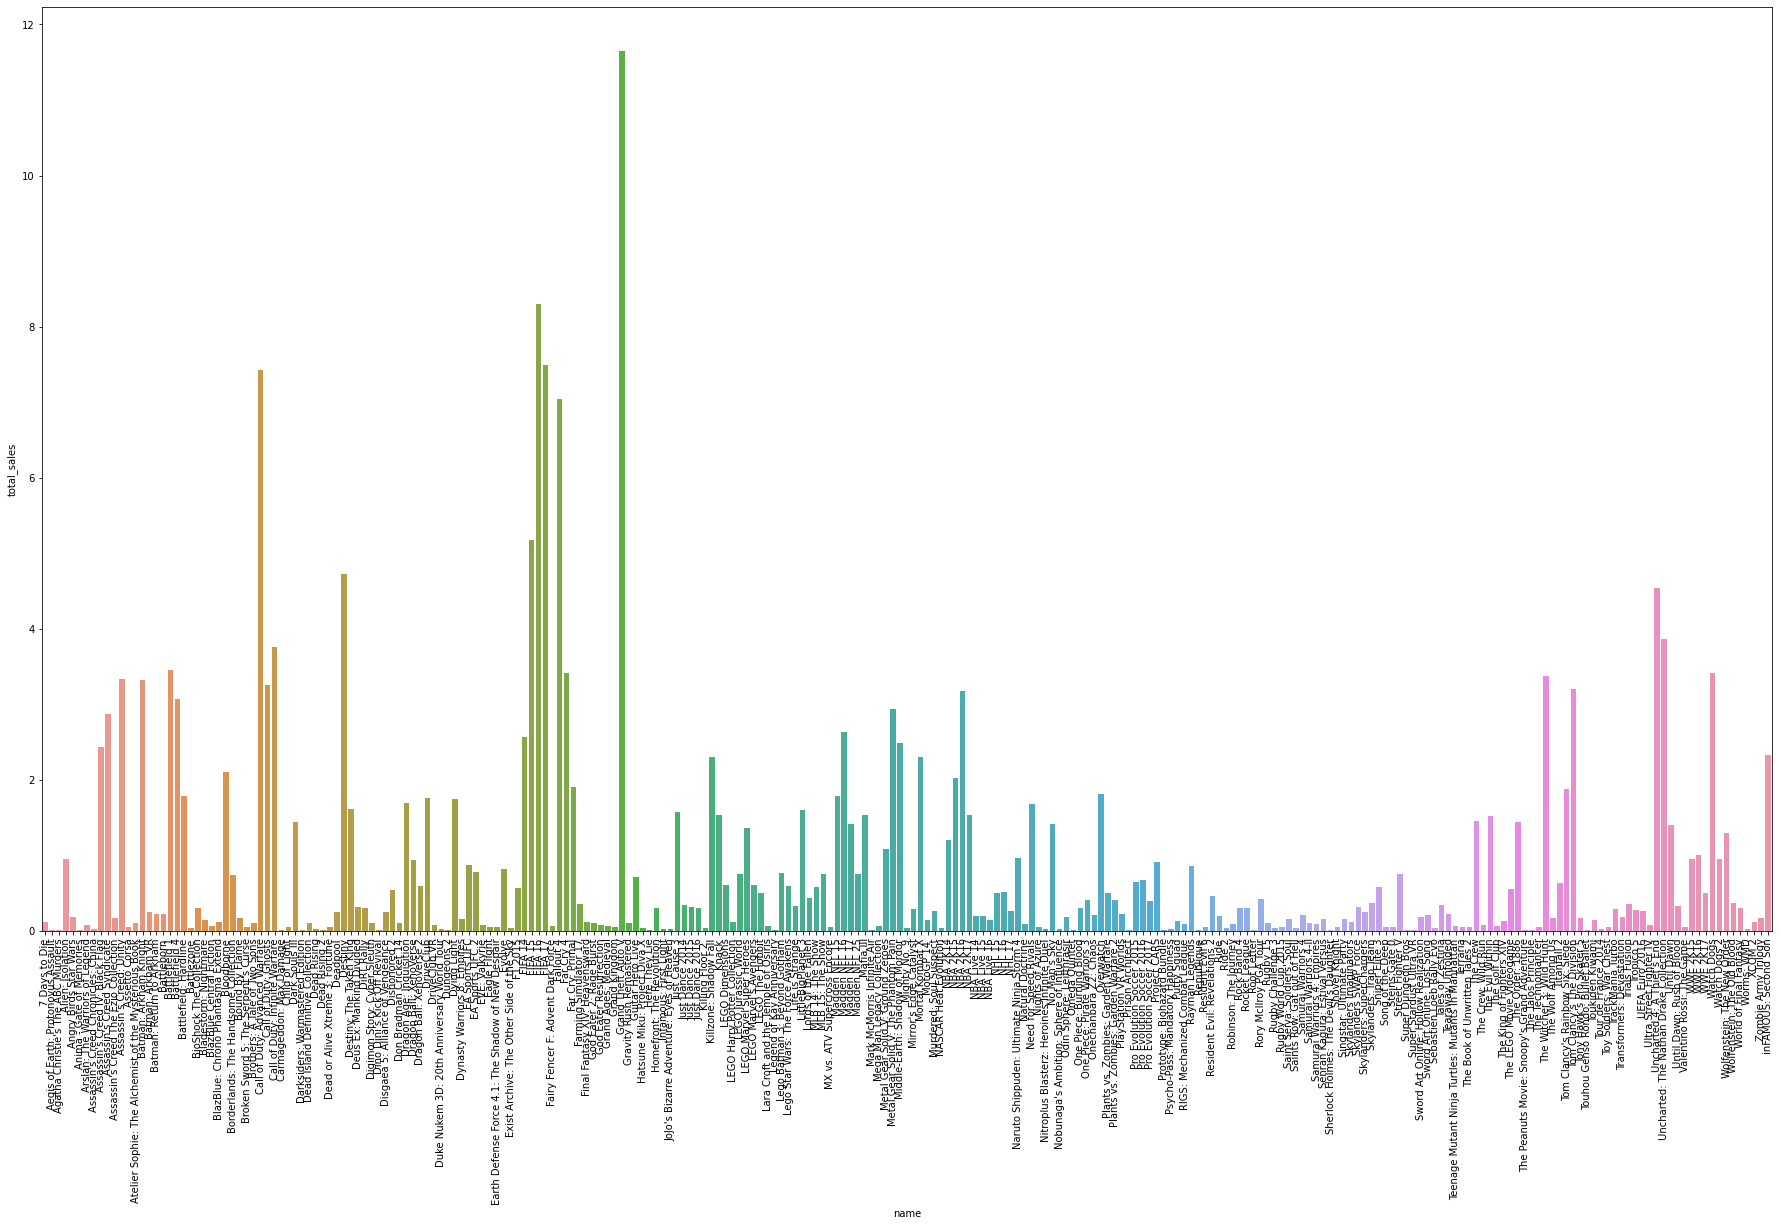

In [142]:
plt.figure(figsize=(31,17))
sns.barplot(data=db_qru_ps4, x='name', y='total_sales');
plt.xticks(rotation=90)
plt.show()


# Kesimpulan lanjutan 
- Adanya beberapa game yang memiliki penjualan jauh melampaui game lainnya
- Pengecekan terhadap game, genre dan beberapa platform untuk pengecekan penjualan harus 

# PS4

In [66]:
salse_ps4 = db_qru_ps4.groupby('name')['user_score','critic_score'].count()

In [67]:
salse_ps4

,user_score,critic_score
name,,
7 Days to Die,1,1
Aegis of Earth: Protonovus Assault,1,1
Agatha Christie's The ABC Murders,1,1
Alien: Isolation,1,1
Angry Birds Star Wars,1,1
...,...,...
World of Final Fantasy,1,1
Worms: WMD,1,1
XCOM 2,1,1


In [68]:
data_pivot_salse = db_qru_ps4.sort_values(by='total_sales',ascending=False)

In [69]:
data_pivot_salse.head(10)

,platform,name,total_sales,critic_score,user_score
83,PS4,Grand Theft Auto V,11.65,97.0,8.3
71,PS4,FIFA 16,8.30,82.0,4.3
72,PS4,FIFA 17,7.49,85.0,5.0
31,PS4,Call of Duty: Advanced Warfare,7.43,83.0,5.7
74,PS4,Fallout 4,7.04,87.0,6.5
70,PS4,FIFA 15,5.18,82.0,5.7
43,PS4,Destiny,4.72,76.0,6.1
232,PS4,Uncharted 4: A Thief's End,4.54,93.0,7.9
233,PS4,Uncharted: The Nathan Drake Collection,3.86,86.0,8.1
33,PS4,Call of Duty: Infinite Warfare,3.76,77.0,3.4


<div class="alert alert-danger">
<b>Chamdani's comment v.1</b> <a class="tocSkip"></a>

**Ingatlah** kamu harus selalu memberikan penjelasan terkait apa yang kamu lakukan, apa yang kamu temukan, dan apa yang menjadi kesimpulan sementaramu **disetiap prosesnya.**
    
**Ingatlah** saya tidak akan mengingatkan ini disetiap bagian pada project, jadi saya akan memintamu sekali untuk semua bagian.

> *Untuk membantumu menjelaskan proses dan insight yang kamu temukan secara lebih rinci dan menggunakan kalimat yang naratif saya telah membuat daftar pertanyaan yang akan sangat membantu.*

**Jelaskan apa yang kamu temukan:**
* apakah ada nilai yang aneh atau anomali? 
* bagaimana nilai anomali itu bisa terjadi? 
* apa saja yang kamu lakukan untuk mengatasi anomali tersebut?
* apa yang melandasimu untuk melakukan hal tersebut?
* apa insight awal yang kamu harapkan?
* apa hasil sebenarnya?

</div>

## Setelah kita melakukan pengecekan terhadap user_score platform, PS4 merupakan platform yang paling laku penjualan pada tahun 2016 sampai 2017. bisa di lihat dari boxplot, histogram, scatterplot dengan penjualan paling banyak adalah Grand Thefr Auto V. 

<div class="alert alert-success">
<b>Chamdani's comment v.2</b> <a class="tocSkip"></a>

Kerja bagus!

</div>

## Analysis game dari beberapa platform

# PS3

In [70]:
db_odo.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3,97.0,8.2,M,20.09
1,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1,97.0,8.1,M,15.86
2,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2,NaN,NaN,NaN,14.25
3,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0,NaN,NaN,NaN,13.82
4,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1,97.0,8.3,M,11.65


In [71]:
db_ac_ps3 = db_odo.groupby(['platform','name'])['total_sales','critic_score','user_score','name'].sum(
).query('platform == "PS3" & critic_score > 0 & user_score > 0').reset_index()

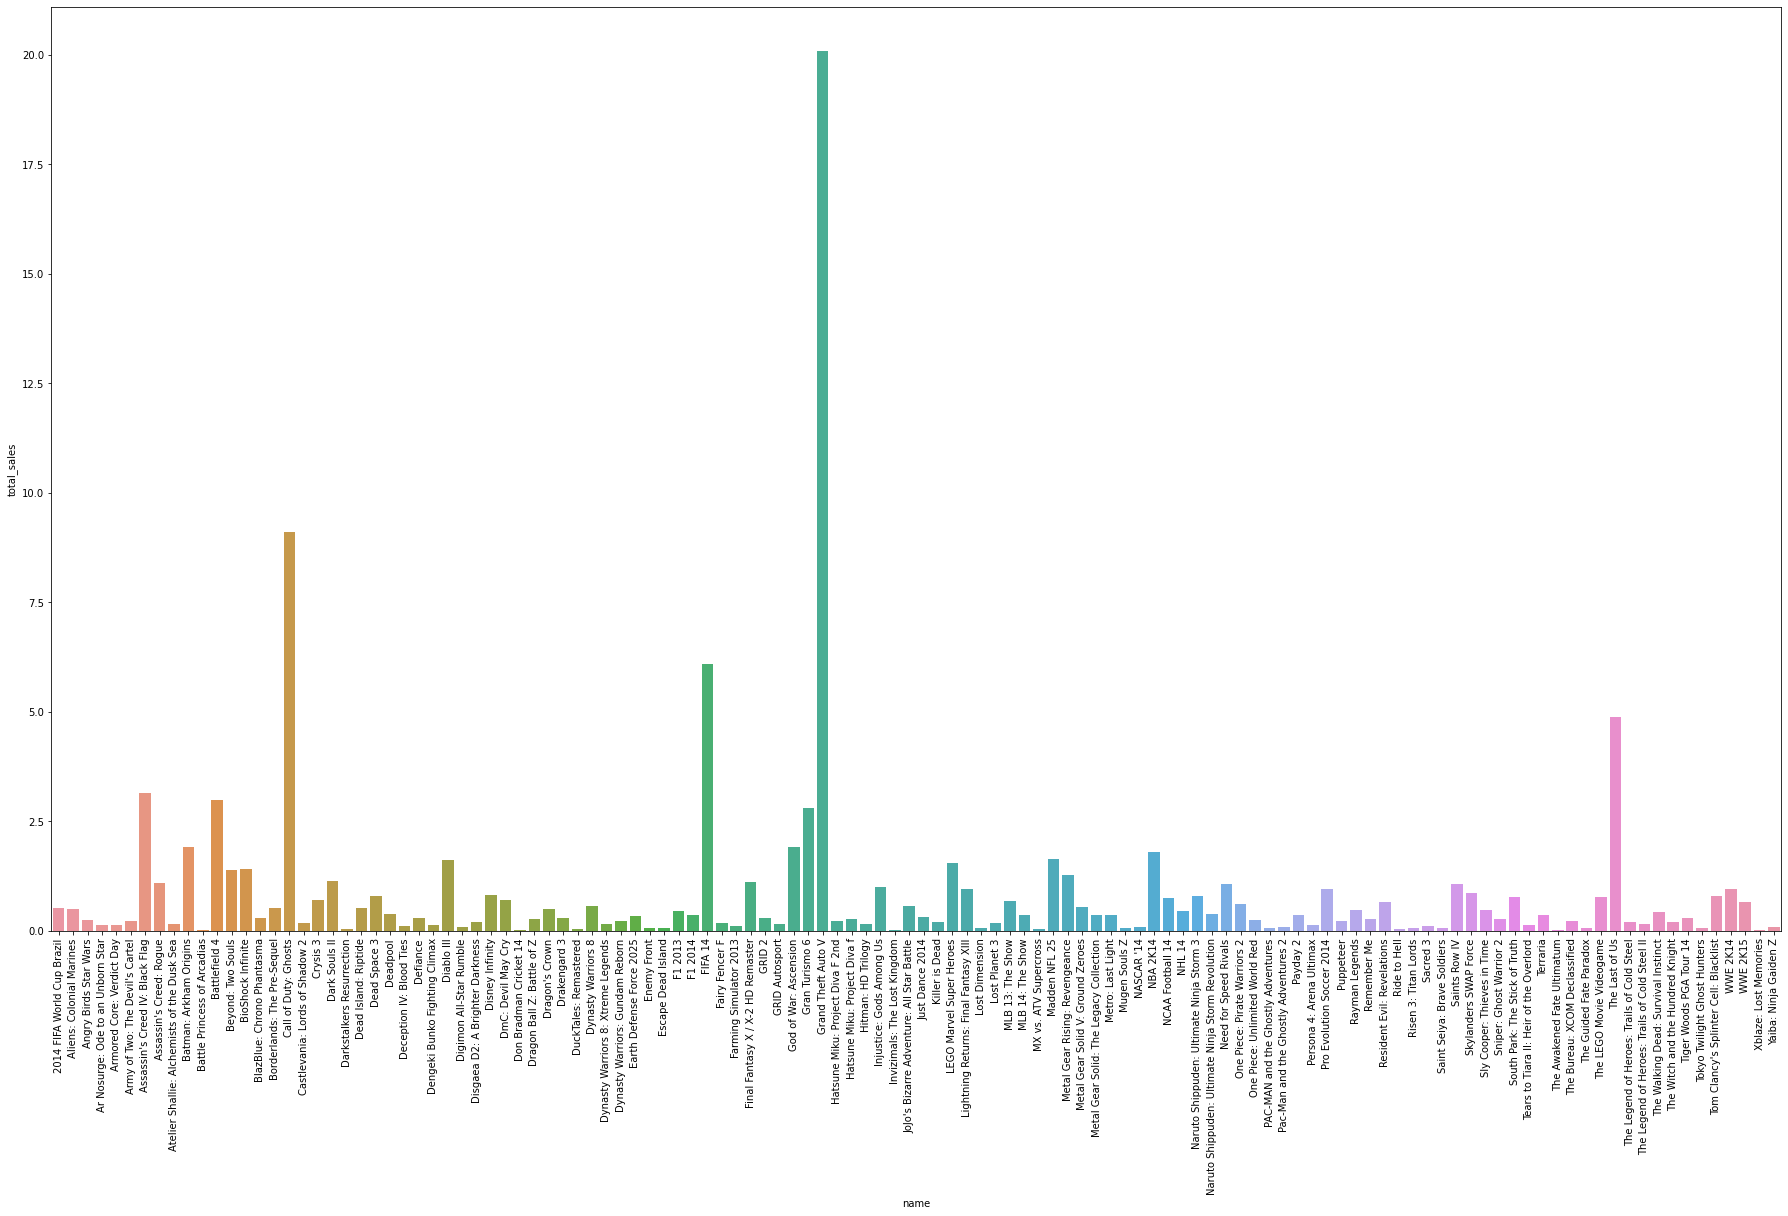

In [143]:
plt.figure(figsize=(31,17))
sns.barplot(data=db_ac_ps3, x='name', y='total_sales') ;
plt.xticks(rotation=90)
plt.show()

<div class="alert alert-warning">
<b>Chamdani's comment v.2</b> <a class="tocSkip"></a>

Kerja bagus! namun saya lihat label x axis kamu bertumpuk, saya rasa itu kurang optimal cobalah untuk menampilkan nya dalam posisi yang telah dirotasi 45 / 90 derajat.
    
Sebagai referensi kamu bisa baca materi berikut ini:
* https://www.geeksforgeeks.org/how-to-rotate-x-axis-tick-label-text-in-matplotlib/
* https://stackoverflow.com/questions/10998621/rotate-axis-text-in-python-matplotlib

</div>

<div class="alert alert-success">
<b>Chamdani's comment v.3</b> <a class="tocSkip"></a>

Kerja bagus!

</div>

In [73]:
data_pivot_salse2 = db_ac_ps3.sort_values(by='total_sales',ascending=False)

In [74]:
data_pivot_salse2.head()

,platform,name,total_sales,critic_score,user_score
53,PS3,Grand Theft Auto V,20.09,97.0,8.2
16,PS3,Call of Duty: Ghosts,9.11,71.0,2.6
45,PS3,FIFA 14,6.09,86.0,4.3
108,PS3,The Last of Us,4.87,95.0,9.1
6,PS3,Assassin's Creed IV: Black Flag,3.14,88.0,8.1


# x360

In [75]:
db_ac_x360 = db_odo.groupby(['platform','name'])['total_sales','critic_score','user_score','name'].sum(
).query('platform == "X360" & critic_score > 0 & user_score > 0').reset_index()

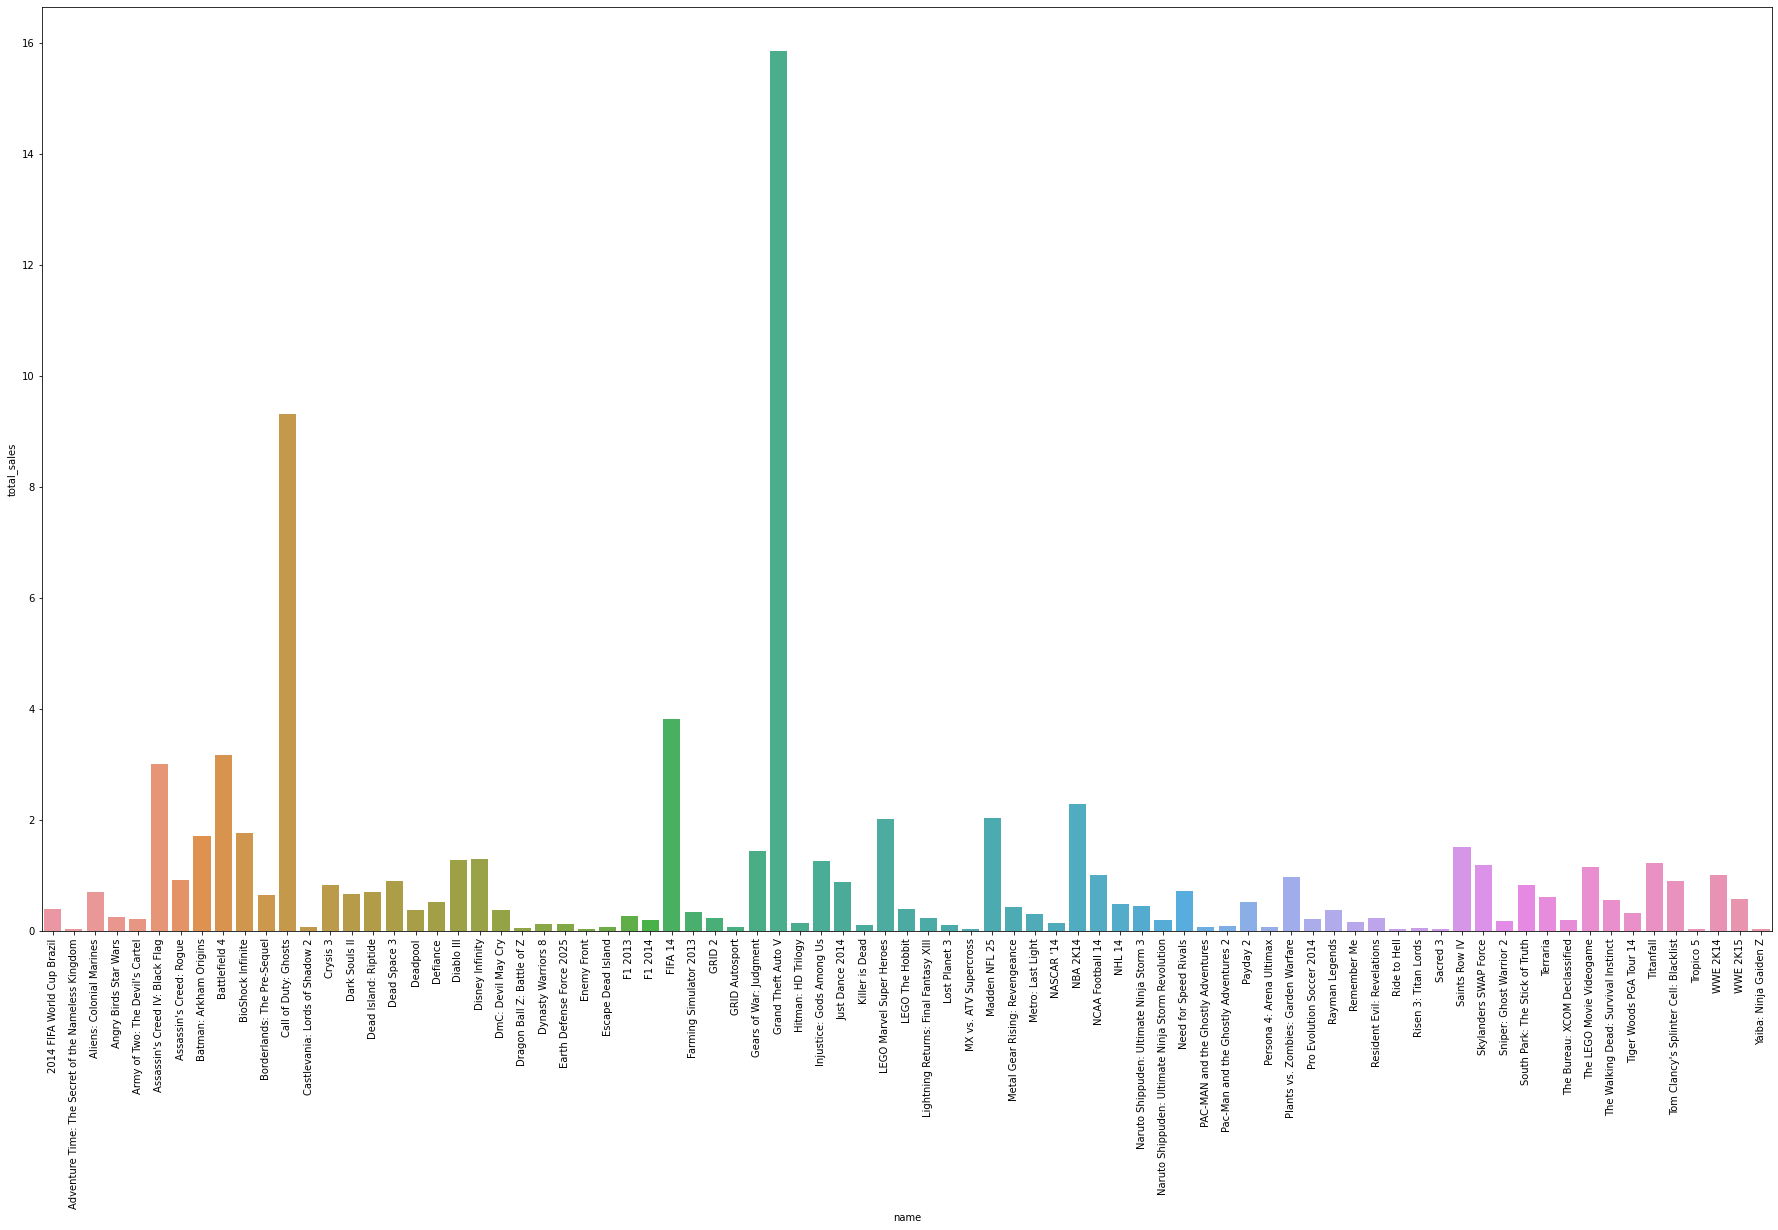

In [144]:
plt.figure(figsize=(31,17))
sns.barplot(data=db_ac_x360, x='name', y='total_sales') ;
plt.xticks(rotation=90)
plt.show()

In [77]:
data_pivot_salse3 = db_ac_x360.sort_values(by='total_sales',ascending=False)

In [78]:
data_pivot_salse3

,platform,name,total_sales,critic_score,user_score
34,X360,Grand Theft Auto V,15.86,97.0,8.1
11,X360,Call of Duty: Ghosts,9.33,73.0,2.6
29,X360,FIFA 14,3.82,84.0,4.2
8,X360,Battlefield 4,3.18,79.0,5.6
5,X360,Assassin's Creed IV: Black Flag,3.02,86.0,7.9
...,...,...,...,...,...
43,X360,MX vs. ATV Supercross,0.05,48.0,4.8
77,X360,Tropico 5,0.05,71.0,7.2
1,X360,Adventure Time: The Secret of the Nameless Kin...,0.05,58.0,7.5
25,X360,Enemy Front,0.04,35.0,5.8


# 3DS

In [79]:
db_ac_3ds = db_odo.groupby(['platform','name'])['total_sales','critic_score','user_score','name'].sum(
).query('platform == "3DS" & critic_score > 0 & user_score > 0').reset_index()

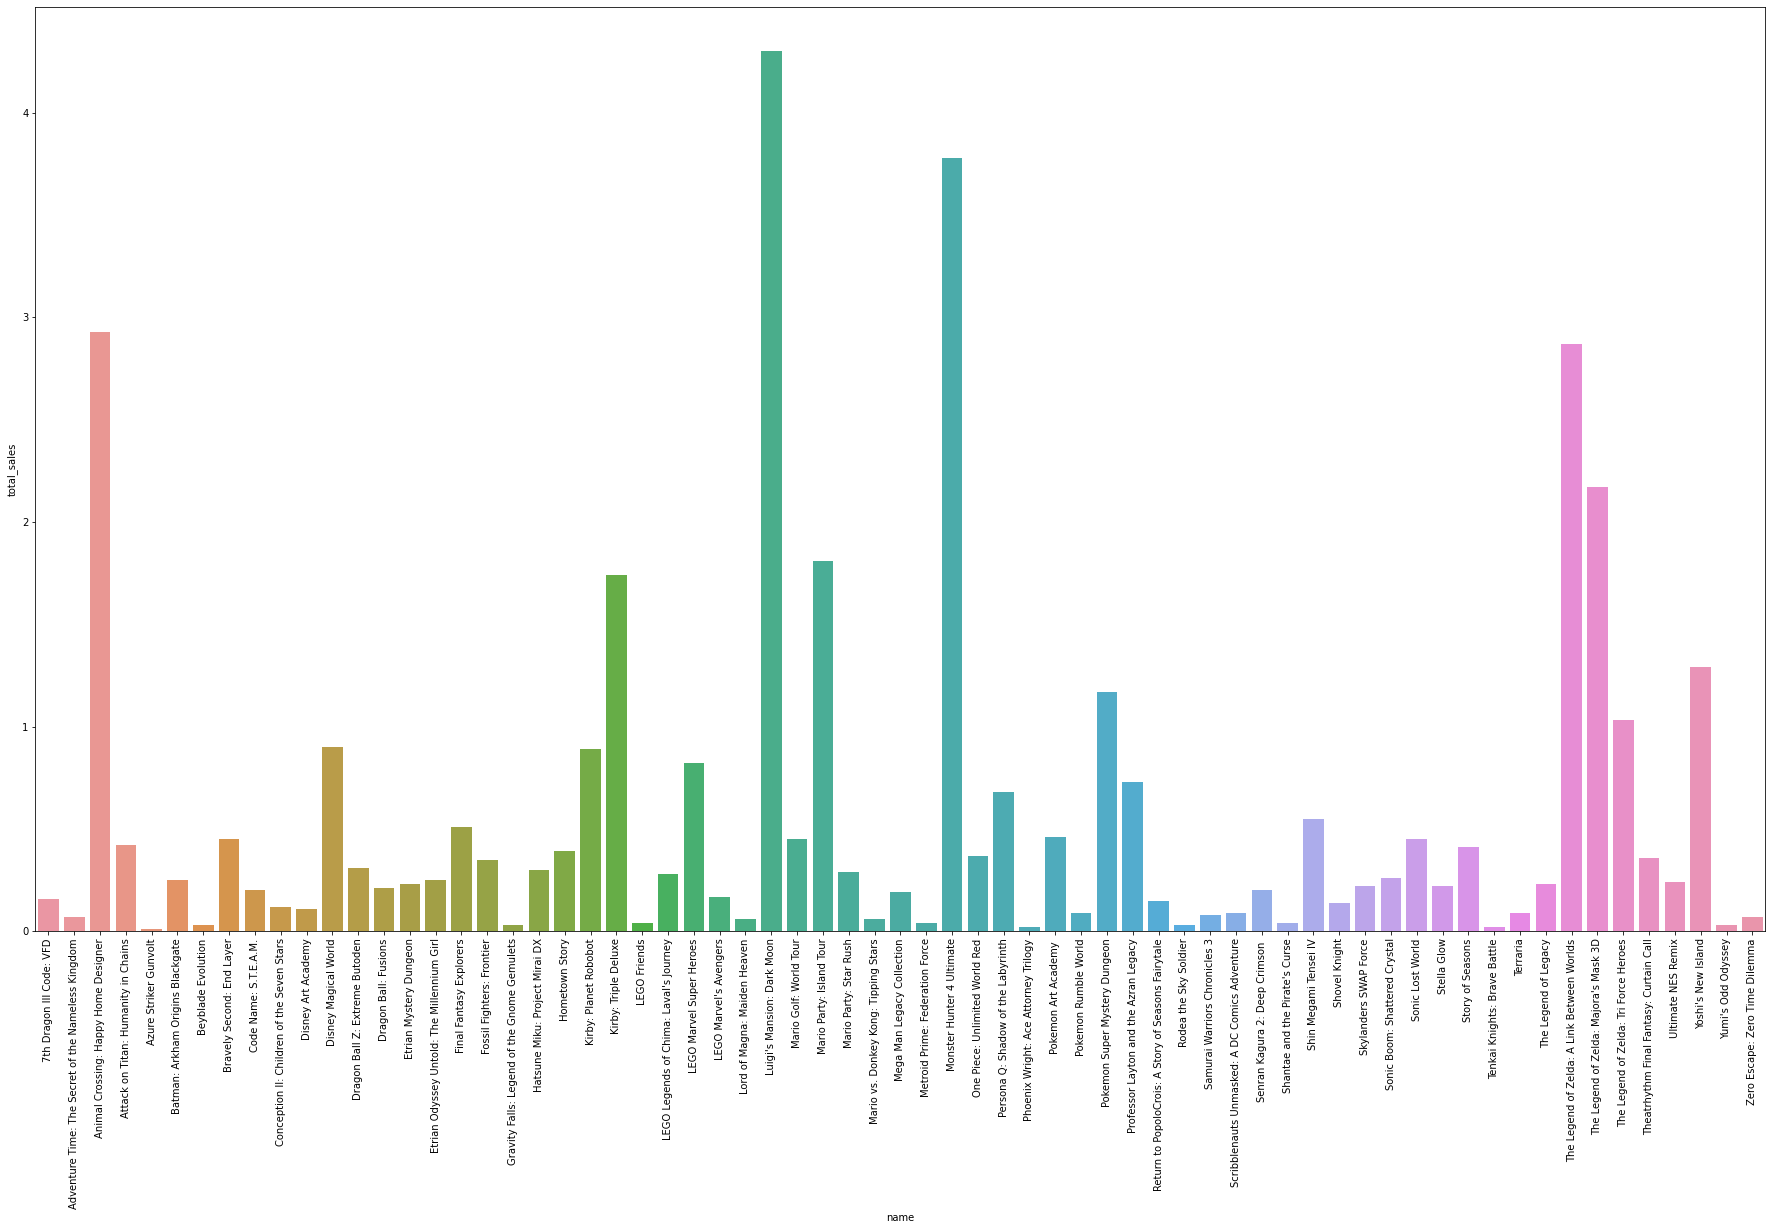

In [145]:
plt.figure(figsize=(31,17))
sns.barplot(data=db_ac_3ds, x='name', y='total_sales') ;
plt.xticks(rotation=90)
plt.show()

In [81]:
data_pivot_salse4 = db_ac_3ds.sort_values(by='total_sales',ascending=False)

In [82]:
data_pivot_salse4.head()

,platform,name,total_sales,critic_score,user_score
28,3DS,Luigi's Mansion: Dark Moon,4.30,86.0,8.4
35,3DS,Monster Hunter 4 Ultimate,3.78,86.0,8.7
2,3DS,Animal Crossing: Happy Home Designer,2.93,66.0,6.9
59,3DS,The Legend of Zelda: A Link Between Worlds,2.87,91.0,8.9
60,3DS,The Legend of Zelda: Majora's Mask 3D,2.17,89.0,9.0


# XONE

In [83]:
db_ac_X1 = db_odo.groupby(['platform','name'])['total_sales','critic_score','user_score','name'].sum(
).query('platform == "XOne" & critic_score > 0 & user_score > 0').reset_index()

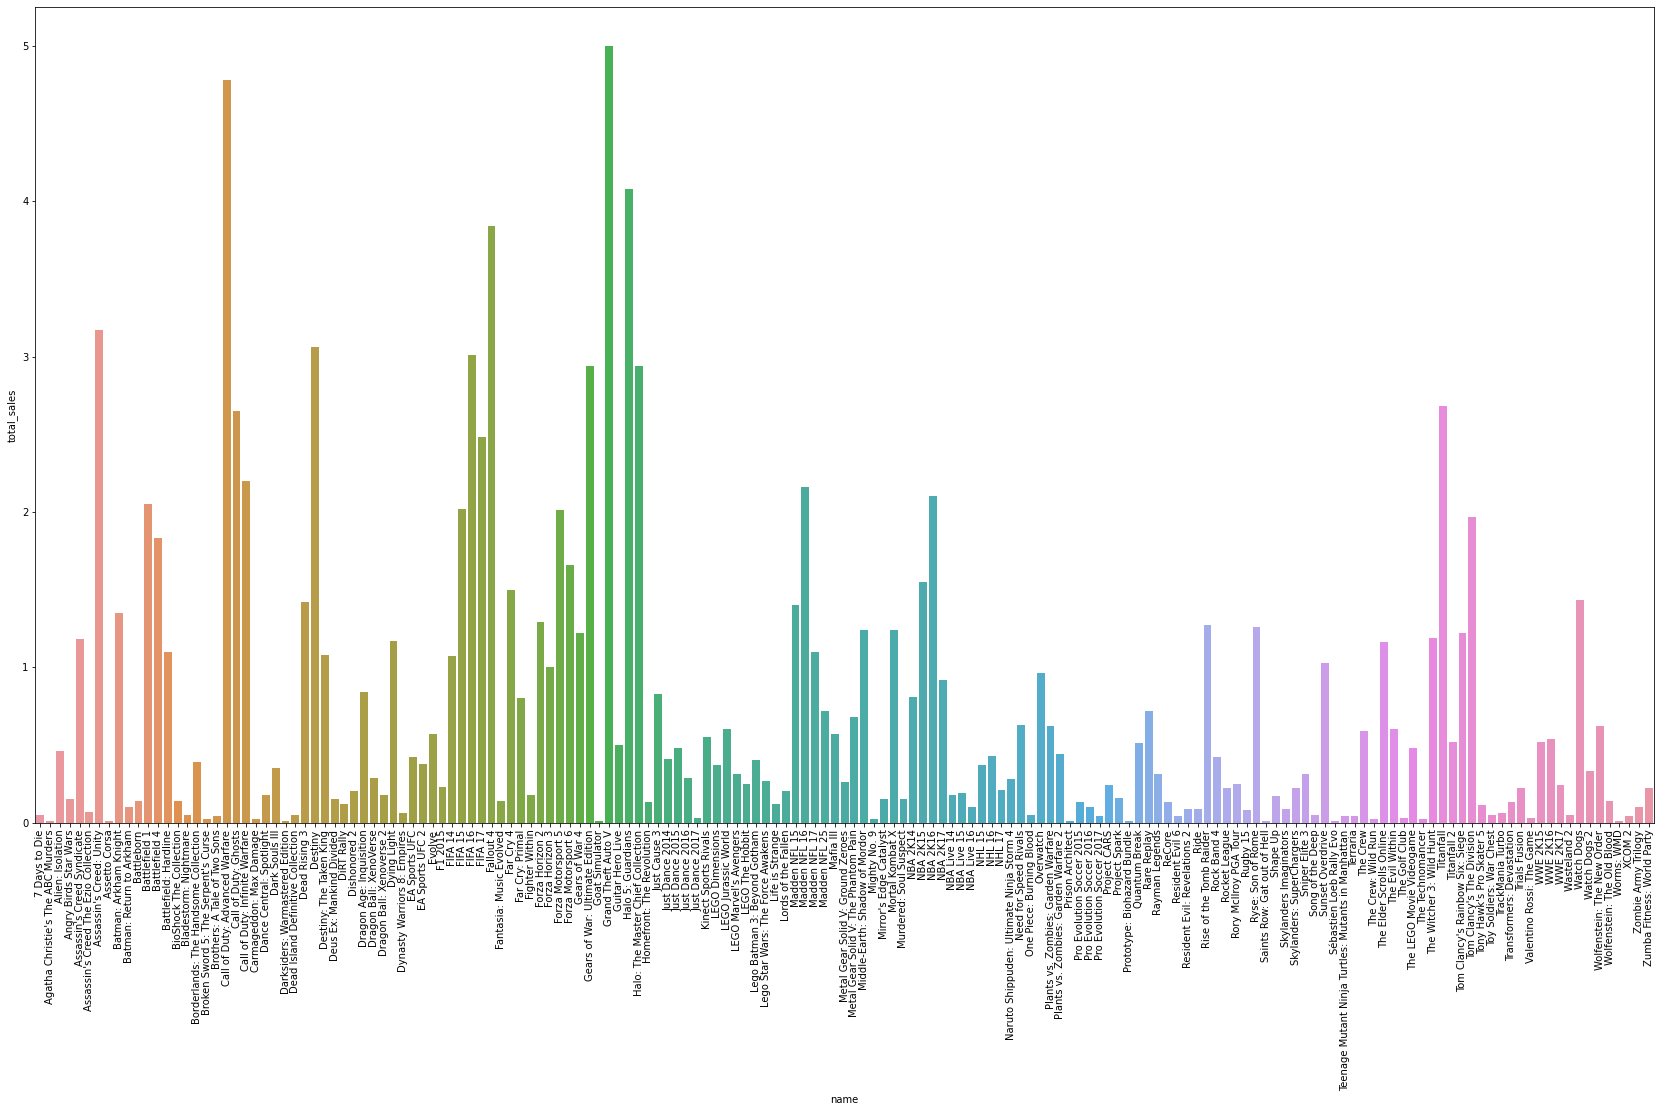

In [146]:
plt.figure(figsize=(29,15))
sns.barplot(data=db_ac_X1, x='name', y='total_sales') ;
plt.xticks(rotation=90)
plt.show()

In [85]:
# Membuat variable dengan pivot table baru untuk melihat penjualan Xone
data_pivot_salse5 = db_ac_X1.sort_values(by='total_sales',ascending=False)

In [86]:
data_pivot_salse5

,platform,name,total_sales,critic_score,user_score
58,XOne,Grand Theft Auto V,5.00,97.0,7.9
19,XOne,Call of Duty: Advanced Warfare,4.78,81.0,5.4
60,XOne,Halo 5: Guardians,4.08,84.0,6.4
46,XOne,Fallout 4,3.84,88.0,6.2
6,XOne,Assassin's Creed: Unity,3.17,72.0,4.1
...,...,...,...,...,...
1,XOne,Agatha Christie's The ABC Murders,0.01,66.0,7.5
7,XOne,Assetto Corsa,0.01,63.0,6.7
111,XOne,Prototype: Biohazard Bundle,0.01,56.0,3.1
161,XOne,Worms: WMD,0.01,75.0,8.1


## dilihat dari total_sales, critic_score, user_score. Bisa di simpulkan semenjak tahun 2013 penjualan GTA V di berbagai platform tetap menjadi game paling laku di jual di berbagai platform. Di susul dengan call of duty frenchise.
- perbedaan antar platform significant
- Setiap platform ada ten

## Melakukan pengecekan terhadap distribusi game berdasarkan genre

In [87]:
db_genreg = db_odo.groupby(['genre','name'])['total_sales','critic_score','user_score','name'].sum(
).query('critic_score > 0 & user_score > 0').reset_index()

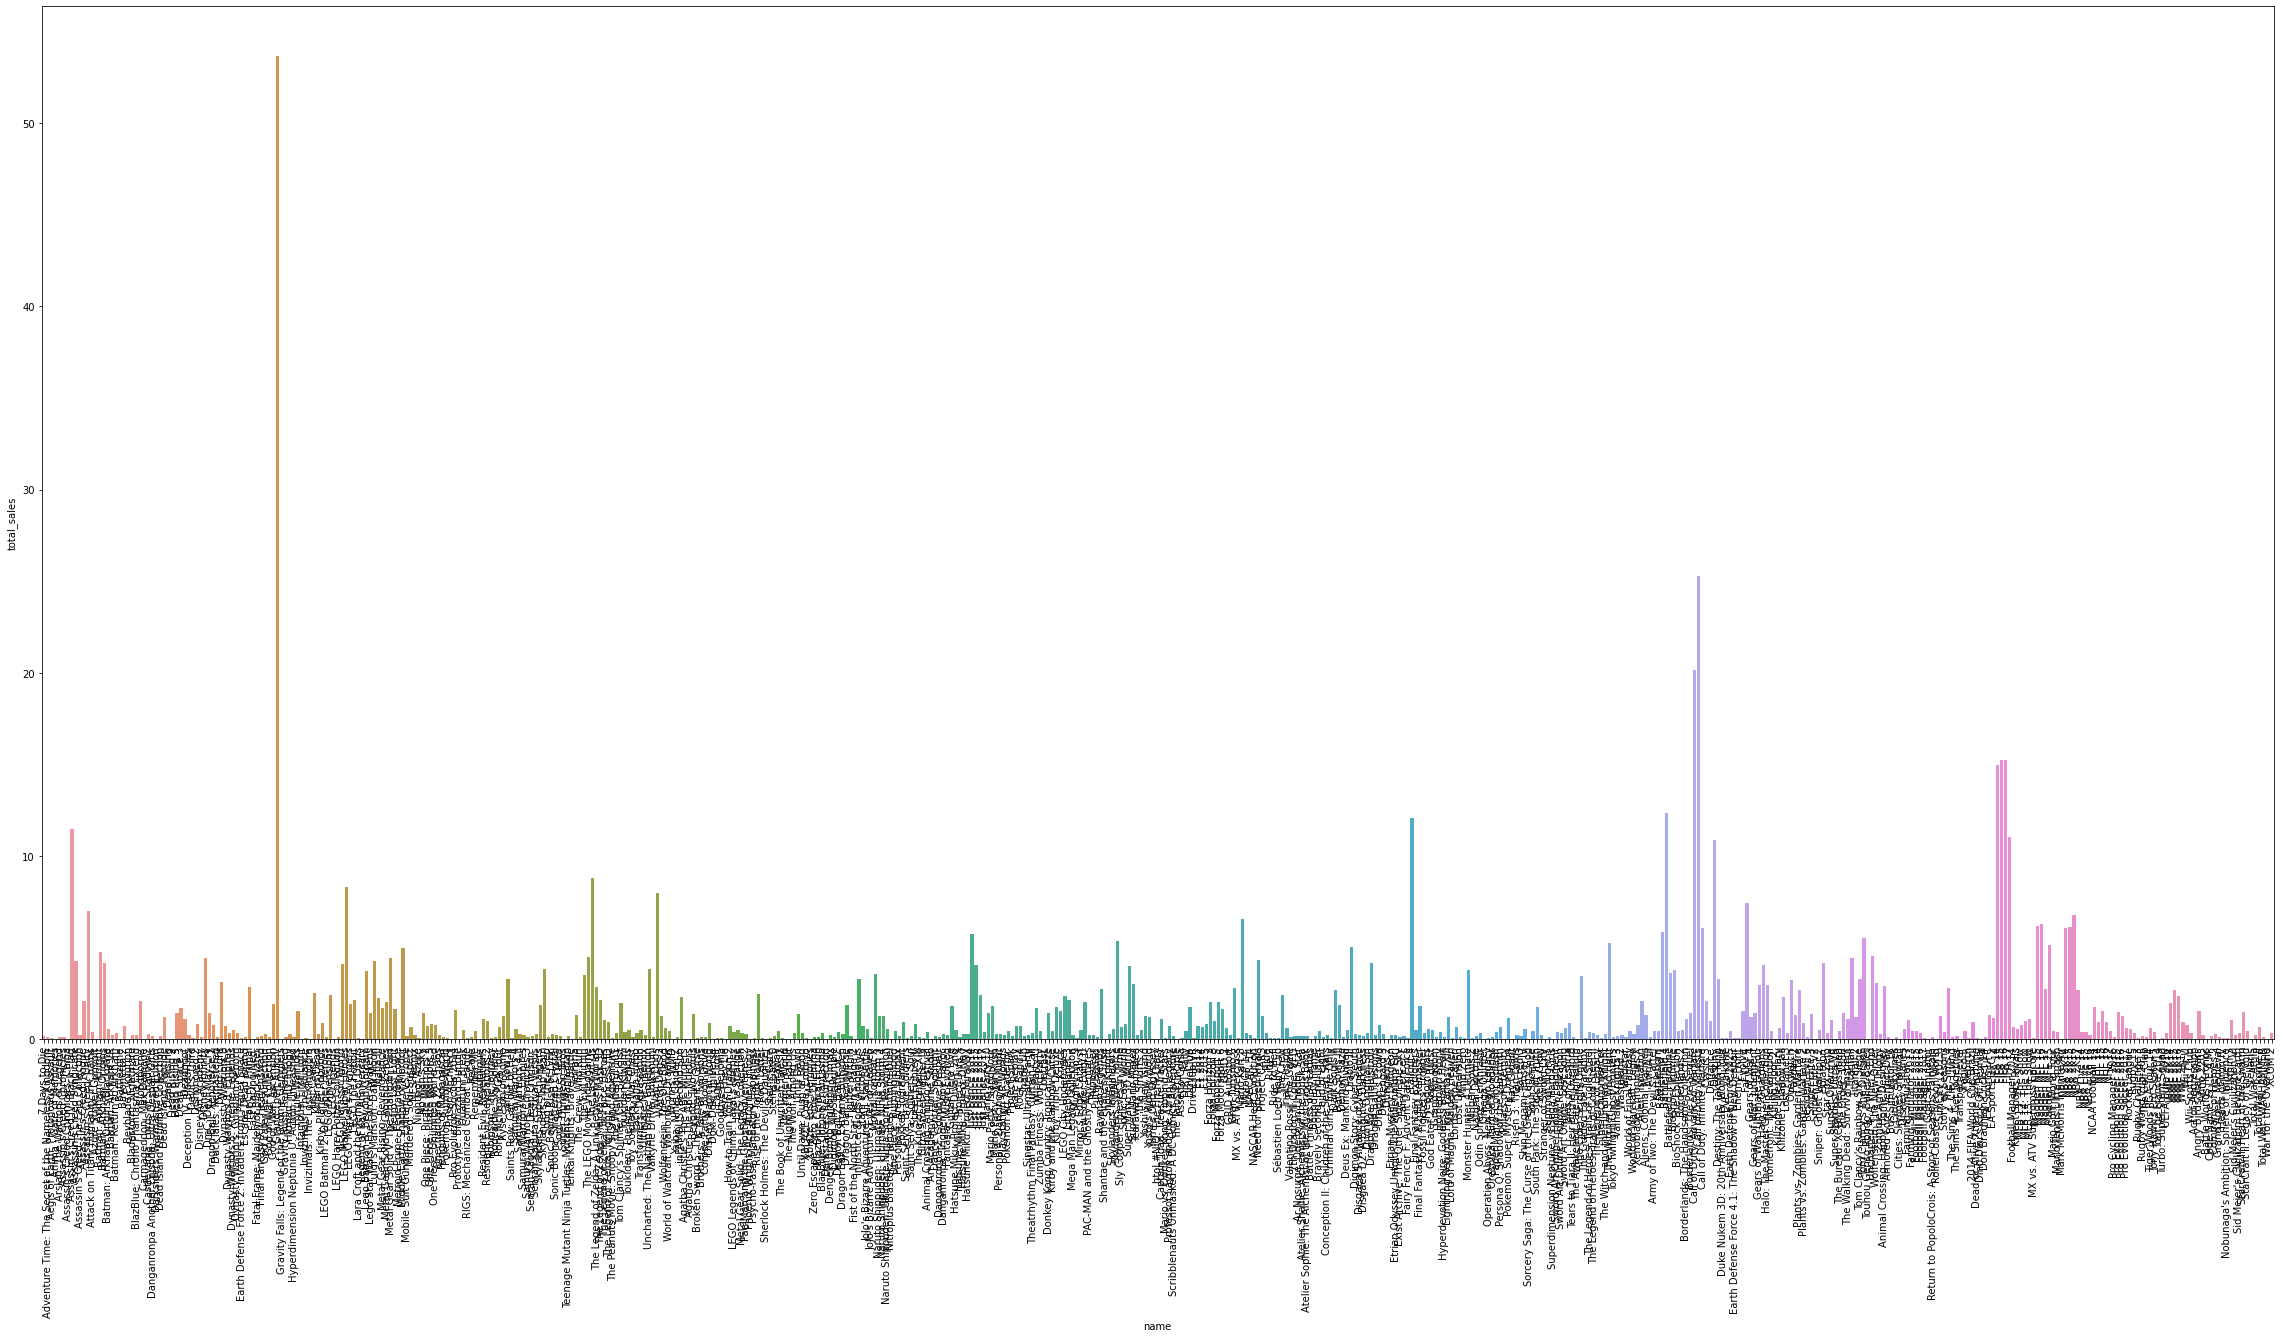

In [148]:
plt.figure(figsize=(40,19))
sns.barplot(data=db_genreg, x='name', y='total_sales') ;
plt.xticks(rotation=90)
plt.show()

In [89]:
data_pivot_salse4 = db_genreg.sort_values(by='total_sales',ascending=False)

In [90]:
data_pivot_salse4

,genre,name,total_sales,critic_score,user_score
58,Action,Grand Theft Auto V,53.68,484.0,40.4
410,Shooter,Call of Duty: Ghosts,25.31,369.0,16.6
409,Shooter,Call of Duty: Advanced Warfare,20.15,242.0,25.3
485,Sports,FIFA 15,15.25,246.0,33.8
486,Sports,FIFA 16,15.25,247.0,19.2
...,...,...,...,...,...
467,Simulation,Goat Simulator,0.01,53.0,6.3
166,Adventure,Doki-Doki Universe,0.01,66.0,5.7
129,Action,Super Dungeon Bros,0.01,42.0,2.3
52,Action,Fast Racing Neo,0.01,81.0,8.5


***terdapat 3 genre dimana sangat mempegaruhi penjualan Action, Shooter, Dan sports. Ketiga genre tersebut mempunyai nilai yang tinggi juga di critic_score dan user_score***

## Adanya kesimpulan terhadap banyaknya penjualan yang bisa di lihat pada analysis yang sudah di lakukan, berdasarkan platform dan genre, dimana bisa di lihat dari visualisasi data. selanjutnya akan di lakukan pemprofilan berdasarkan wilayah target penjualan.

***Melakukan analysis terhadap Wilayah dengan penjualan tertinggi pada 5 platform dengan performa penjualan tertinggi, dan 5 genre paling favorit. Dan hasil analysis akan menggunakan rating ESRB untuk menentukan penjualan di masing masing wilayah.*** 

In [91]:
db_odo.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3,97.0,8.2,M,20.09
1,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1,97.0,8.1,M,15.86
2,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2,NaN,NaN,NaN,14.25
3,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0,NaN,NaN,NaN,13.82
4,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1,97.0,8.3,M,11.65


In [92]:
platform_sales_grigat = db_odo.groupby(['platform'])['na_sales','eu_sales','jp_sales'].sum().reset_index()

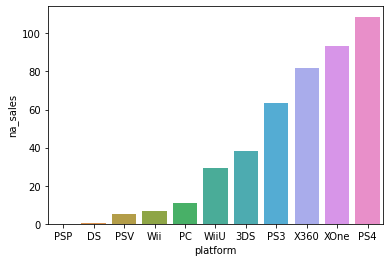

In [93]:
sns.barplot(data=platform_sales_grigat.sort_values(by='na_sales'), x='platform',y='na_sales');

### na_sales dinamis dengan PS4 platform yang mempunyai penjualan paling banyak
- ke dua Xone 
- ke tiga X360
- ke empat PS3
- ke lima 3DS

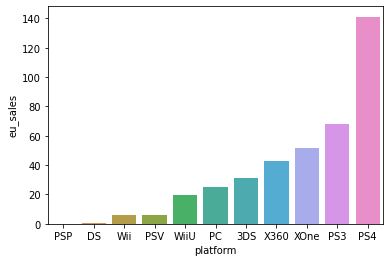

In [94]:
sns.barplot(data=platform_sales_grigat.sort_values(by='eu_sales'), x='platform',y='eu_sales');

<div class="alert alert-success">
<b>Chamdani's comment v.2</b> <a class="tocSkip"></a>

Kerja bagus!

</div>

### eu_sales hampir sama dengan PS4 platform yang mempunyai penjualan paling banyak
- ke dua Xone 
- ke tiga X360
- ke empat PS3
- ke lima 3DS

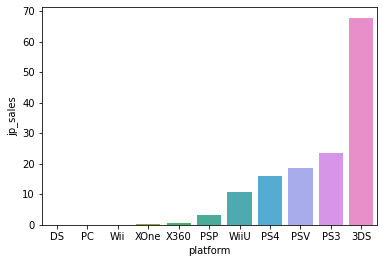

In [95]:
sns.barplot(data=platform_sales_grigat.sort_values(by='jp_sales'), x='platform',y='jp_sales');

### jp_sales berbeda dengan penjualan 3DS sebagai platform yang paling banyak mendapatkan penjualan
- ke dua PS3
- ke tiga PSV
- ke empat PS4
- ke lima WIIU

In [96]:
platform_sales_grigat

,platform,na_sales,eu_sales,jp_sales
0,3DS,38.20,30.96,67.81
1,DS,0.57,0.85,0.00
2,PC,11.11,25.36,0.00
3,PS3,63.50,67.81,23.35
4,PS4,108.74,141.09,15.96
5,PSP,0.00,0.17,3.29
6,PSV,5.04,6.10,18.59
7,Wii,6.56,5.93,0.05
8,WiiU,29.21,19.85,10.88
9,X360,81.66,42.52,0.51


***Dari penjualan platform dapat di simpulkan PS4 memiliki penjualan paling banyak, berbedan dengan wilayah jp_sales. dimana penjualan paling banyak adalah 3DS.***

In [97]:
genre_sales_grogit = db_odo.groupby(['genre'])['na_sales','eu_sales','jp_sales'].sum().reset_index()

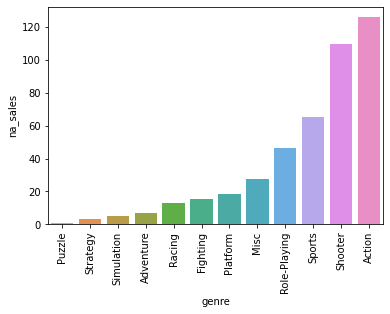

In [149]:
sns.barplot(data=genre_sales_grogit.sort_values(by='na_sales'), x='genre',y='na_sales');
plt.xticks(rotation=90)
plt.show()

<div class="alert alert-warning">
<b>Chamdani's comment v.2</b> <a class="tocSkip"></a>

Kerja bagus! namun saya lihat label x axis kamu bertumpuk, saya rasa itu kurang optimal cobalah untuk menampilkan nya dalam posisi yang telah dirotasi 45 / 90 derajat.
    
Sebagai referensi kamu bisa baca materi berikut ini:
* https://www.geeksforgeeks.org/how-to-rotate-x-axis-tick-label-text-in-matplotlib/
* https://stackoverflow.com/questions/10998621/rotate-axis-text-in-python-matplotlib

</div>

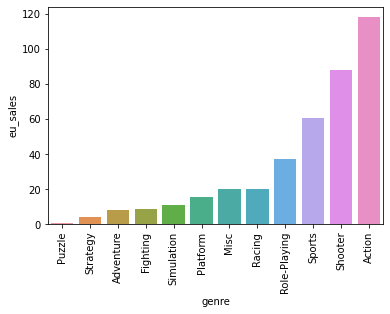

In [150]:
sns.barplot(data=genre_sales_grogit.sort_values(by='eu_sales'), x='genre',y='eu_sales');
plt.xticks(rotation=90)
plt.show()

<div class="alert alert-warning">
<b>Chamdani's comment v.2</b> <a class="tocSkip"></a>

Kerja bagus! namun saya lihat label x axis kamu bertumpuk, saya rasa itu kurang optimal cobalah untuk menampilkan nya dalam posisi yang telah dirotasi 45 / 90 derajat.
    
Sebagai referensi kamu bisa baca materi berikut ini:
* https://www.geeksforgeeks.org/how-to-rotate-x-axis-tick-label-text-in-matplotlib/
* https://stackoverflow.com/questions/10998621/rotate-axis-text-in-python-matplotlib

</div>

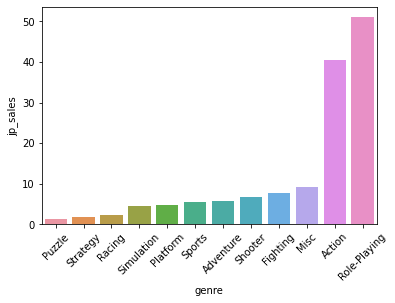

In [152]:
sns.barplot(data=genre_sales_grogit.sort_values(by='jp_sales'), x='genre',y='jp_sales');
plt.xticks(rotation=45)
plt.show()

In [101]:
genre_sales_grogit

,genre,na_sales,eu_sales,jp_sales
0,Action,126.05,118.13,40.49
1,Adventure,7.14,8.25,5.82
2,Fighting,15.55,8.55,7.65
3,Misc,27.49,20.04,9.20
4,Platform,18.14,15.58,4.79
5,Puzzle,0.83,1.00,1.18
6,Racing,12.96,20.19,2.30
7,Role-Playing,46.40,36.97,51.04
8,Shooter,109.74,87.86,6.61
9,Simulation,4.86,10.92,4.52


***Dari genre bisa di simpulkan dari setiap wilayah, Action merupakan genre yang memiliki kecenderungan untuk di beli. Kita bisa menyimpulkan bahwa jepang memiliki penyebaran yang paling normal jika di lihat dari agregasi nya. di karenakan role playing dan action memiliki persebran yang hampir merata.***  

In [102]:
db_odo['rating'].value_counts()

M       369
T       333
E       302
E10+    252
Name: rating, dtype: int64

In [103]:
rating_girot = db_odo.groupby(['rating'])['na_sales','eu_sales','jp_sales'].sum().reset_index()

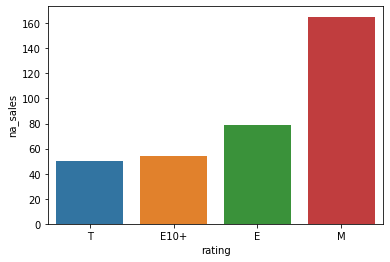

In [104]:
sns.barplot(data=rating_girot.sort_values(by='na_sales'), x='rating',y='na_sales');

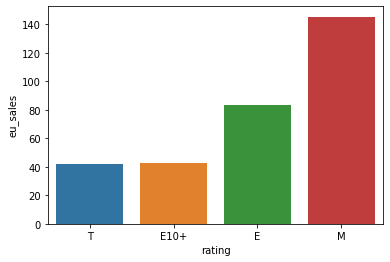

In [105]:
sns.barplot(data=rating_girot.sort_values(by='eu_sales'), x='rating',y='eu_sales');

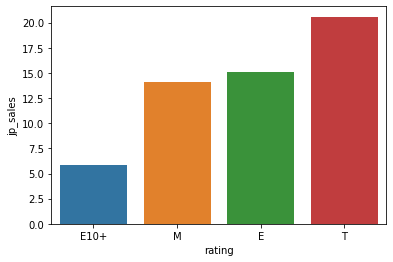

In [106]:
sns.barplot(data=rating_girot.sort_values(by='jp_sales'), x='rating',y='jp_sales');

In [107]:
rating_girot

,rating,na_sales,eu_sales,jp_sales
0,E,79.05,83.36,15.14
1,E10+,54.24,42.69,5.89
2,M,165.21,145.32,14.11
3,T,49.79,41.95,20.59


## Kesimpulan awal dari visualisasi data yang sudah kita lakukan.  Dapat di lihat dari penjualan, genre, dan rating. dari persebaran NA,EU,JP . NA memiliki kecenderungan untuk bermain game Action, begitu pula dengan EU. kemungkinan besar dari rating ESRB juga menunjukan gamers dari EU dan NA berumur lebih dari 15 tahun. JP memiliki data yang memiliki keunikan persebaran berbeda dari NA dan EU. 

## Untuk memberikan hipotesis.
-  Rata-rata rating pengguna platform Xbox dan PC adalah sama.
- Rata-rata rating pengguna genre Action dan Sports berbeda.
- Tetapkan sender Nilai ambling batas alpha.
- Penggunaan hipotesis nol dan alternatif.
- Tingkat signifikansi yang anda pilih untuk pengujian hipitesis dan penjelasan pemilihan angka tersebut.

 

## Membuat hipotesis PC dan XBONE untuk mengetahui rating pengguna 
- H0 : Rata - rata rating pengguna platform Xbox One dan PC adalah SAMA
- H1 : Rata - rata rating pengguna platform Xbox One dan PC adalah TIDAK SAMA

In [108]:
db_odo['platform'].value_counts()

PS4     392
PSV     358
PS3     345
3DS     303
XOne    247
PC      189
X360    186
WiiU    115
PSP      67
Wii      23
DS        8
Name: platform, dtype: int64

In [109]:
oddb_PC = db_odo[db_odo['platform']=='PC'].reset_index(drop=True)
oddb_X1 = db_odo[db_odo['platform']=='XOne'].reset_index(drop=True)


In [110]:
db_odo.dtypes

name                object
platform            object
year_of_release      int64
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales          int64
critic_score       float64
user_score         float64
rating              object
total_sales        float64
dtype: object

In [111]:
oddb_PC.isna().sum()

name                0
platform            0
year_of_release     0
genre               0
na_sales            0
eu_sales            0
jp_sales            0
other_sales         0
critic_score       40
user_score         34
rating             49
total_sales         0
dtype: int64

In [112]:
oddb_PC = oddb_PC.dropna()

In [113]:
oddb_X1 = oddb_X1.dropna()

In [114]:
oddb_PC.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 133 entries, 0 to 188
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             133 non-null    object 
 1   platform         133 non-null    object 
 2   year_of_release  133 non-null    int64  
 3   genre            133 non-null    object 
 4   na_sales         133 non-null    float64
 5   eu_sales         133 non-null    float64
 6   jp_sales         133 non-null    float64
 7   other_sales      133 non-null    int64  
 8   critic_score     133 non-null    float64
 9   user_score       133 non-null    float64
 10  rating           133 non-null    object 
 11  total_sales      133 non-null    float64
dtypes: float64(6), int64(2), object(4)
memory usage: 13.5+ KB


In [115]:
np.var(oddb_PC['user_score']), np.var(oddb_X1['user_score'])

(3.066639154276669, 1.780140817214509)

In [116]:
alpha = 0.05
results_platpuw = st.ttest_ind(oddb_PC['user_score'],oddb_X1['user_score'],equal_var=True)
results_platpuw.pvalue

0.131558554879108

In [117]:
if (results_platpuw.pvalue < alpha):
    print('Rata - rata rating pengguna platform Xbox One dan PC adalah SAMA')
else : 
    print('Rata - rata rating pengguna platform Xbox One dan PC adalah TIDAK SAMA')

Rata - rata rating pengguna platform Xbox One dan PC adalah TIDAK SAMA


# PC

In [118]:
db_ac_pc = db_odo.groupby(['platform','name'])['total_sales','critic_score','user_score','name'].sum(
).query('platform == "PC" & critic_score > 0 & user_score > 0').reset_index()

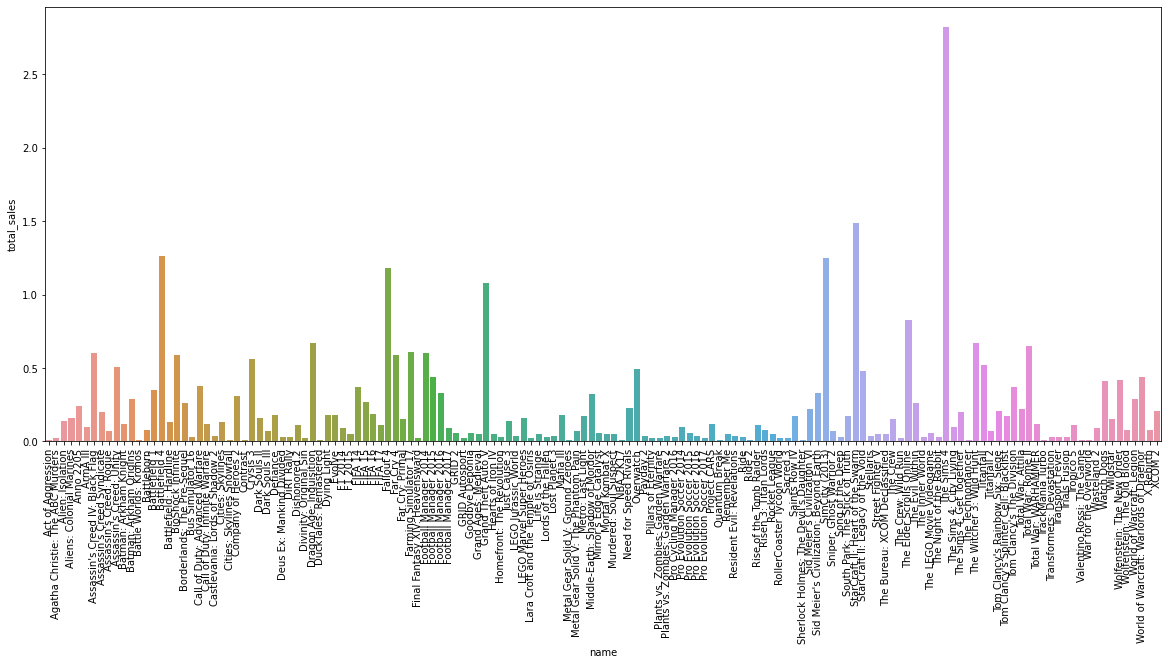

In [153]:
plt.figure(figsize=(20,8))
sns.barplot(data=db_ac_pc, x='name', y='total_sales') ;
plt.xticks(rotation=90)
plt.show()

In [120]:
data_pivot_salse6 = db_ac_pc.sort_values(by='total_sales',ascending=False)

In [121]:
data_pivot_salse6.head()

,platform,name,total_sales,critic_score,user_score
119,PC,The Sims 4,2.82,70.0,3.9
107,PC,StarCraft II: Heart of the Swarm,1.49,86.0,7.9
15,PC,Battlefield 4,1.26,81.0,6.0
103,PC,SimCity (2013),1.25,64.0,2.2
45,PC,Fallout 4,1.18,84.0,5.4


***Kesimpulan yang bisa di ambil dari perbandingan xbox dan PC, mempunyai user yang berbeda apa yang ingin di mainkan dengan platform yang di bandingkan. Dengan memberikan gambaran bagaimana user PC mempunyai kecenderungan permainan game yang sangat berbeda dari Xone. Hal ini sangat bagus jika ingin melakukan pengumpulan game di toko yang tersedia***

## Hipotesis awal rating yang mempengaruhi untuk penjualan 
- Rating memiliki korelasi yang tinggi terhadap penjualan
- platform yang memiliki rating dengan korelasi user score tidak sama di karenakan perbedaan game jika di lihat dari barplot yang sudah kita buat


## Membuat hipotesis genre Action dan Sports untuk mengetahui rating pengguna 
- H0 : Rata - rata rating pengguna genre Action dan Sports adalah SAMA
- H1 : Rata - rata rating pengguna genre Action dan Sports adalah TIDAK SAMA

In [122]:
db_odo['genre'].value_counts()

Action          766
Role-Playing    292
Adventure       245
Sports          214
Shooter         187
Misc            155
Racing           85
Fighting         80
Platform         74
Simulation       62
Strategy         56
Puzzle           17
Name: genre, dtype: int64

In [123]:
oddb_action = db_odo[db_odo['genre']=='Action'].reset_index(drop=True)
oddb_sports = db_odo[db_odo['genre']=='Sports'].reset_index(drop=True)

In [124]:
oddb_action.isna().sum()

name                 0
platform             0
year_of_release      0
genre                0
na_sales             0
eu_sales             0
jp_sales             0
other_sales          0
critic_score       453
user_score         377
rating             347
total_sales          0
dtype: int64

In [125]:
oddb_action = oddb_action.dropna()

In [126]:
oddb_sports = oddb_sports.dropna()

In [127]:
oddb_action.isna().sum()

name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
total_sales        0
dtype: int64

In [128]:
np.var(oddb_action['user_score']), np.var(oddb_sports['user_score'])

(1.6547978499133564, 2.1289293342826627)

In [129]:
alpha = 0.05
results_grypuw = st.ttest_ind(oddb_action['user_score'],oddb_sports['user_score'],equal_var=True)
results_grypuw.pvalue

1.7886065917750245e-15

In [130]:
if (results_grypuw.pvalue < alpha):
    print('Rata - rata rating pengguna genre Action dan Sport adalah SAMA')
else : 
    print('Rata - rata rating pengguna genre Action dan Sport adalah TIDAK SAMA')

Rata - rata rating pengguna genre Action dan Sport adalah SAMA


In [131]:
db_gretz_sales =  pd.pivot_table(
    db_odo,index='platform', columns='genre', values='total_sales', aggfunc=sum).fillna(0).astype(int)

In [132]:
db_gretz_sales

genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
platform,,,,,,,,,,,,
3DS,32,3,7,6,8,1,0,64,0,9,1,1
DS,0,0,0,0,0,0,0,0,0,0,0,0
PC,6,0,0,0,0,0,0,4,9,7,1,4
PS3,63,3,5,7,2,0,5,14,28,0,28,0
PS4,82,5,7,6,6,0,10,25,78,1,48,0
PSP,0,0,0,0,0,0,0,1,0,0,0,0
PSV,8,3,1,3,0,0,0,9,1,0,1,0
Wii,2,0,0,6,2,0,0,0,0,0,0,0
WiiU,13,0,5,6,15,1,6,1,5,0,2,1


## Hipotesis korelasi genre Action dan Sport 
- Pembeli atau yang biasa di sebut gamers, memiliki kecenderungan untuk memacu adrenaline dengan bermain game action dan sport
- kita bisa melihat rating dari 347 gamers yang memiliki berbagai macam gamers yang menyukai game dengan genre yang sama 


# Kesimpulan umum
- Untuk dapat memberikan saran kampanye pemasaran, hal yang pertama di lakukan adalah melihat data yang ada pada data set yang tersedia semenjak tahun 80 an
- bisa di lihat dari platform yang ada dan tersedia semenjak tahun 80 dan bagaimana penjualan yang di dapatkan dari berbagai daerah yang terjangkau dari penjualan toko game "ICE"
- Berbagai korelasi untuk meningkatkan penjualan bisa di lihat platform dan user_score
- PS4 dan GTA 5 merupakan sumber pemasukan paling banyak yang bisa menjadi target pemasaran jika di paralel dengan user_score
- Wilayah sangat mempengaruhi penjualan berdasarkan platform dan genre yang bisa juga menjadi tolak ukur penentuan pemasaran
- Tetap menggunakan standard alpha 5 % untuk menentukan persebaran rata rata dari rata rata variance dimana menentukan penjualan berdasarkan platform dan genre
- Untuk kedepannya penjualan dari 


<div class="alert alert-warning">
<b>Chamdani's comment v.2</b> <a class="tocSkip"></a>

Kerja bagus! namun saya lihat label x axis kamu bertumpuk, saya rasa itu kurang optimal cobalah untuk menampilkan nya dalam posisi yang telah dirotasi 45 / 90 derajat.
    
Sebagai referensi kamu bisa baca materi berikut ini:
* https://www.geeksforgeeks.org/how-to-rotate-x-axis-tick-label-text-in-matplotlib/
* https://stackoverflow.com/questions/10998621/rotate-axis-text-in-python-matplotlib

</div>